In [11]:
import pandas as pd

merged = pd.read_csv('data/merged.csv')
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')

In [2]:
X_train.isnull().sum()

age                0
embarked           0
fare               0
parch              0
p_class            0
sib_sp             0
cabin_letter       0
title              0
is_male            0
n_words_in_name    0
family_size        0
dtype: int64

In [3]:
X_train.head()

,age,embarked,fare,parch,p_class,sib_sp,cabin_letter,title,is_male,n_words_in_name,family_size
0,22.0,S,7.2500,0,3,1,?,Mr,1,4,2
1,38.0,C,71.2833,0,1,1,C,Mrs,0,7,2
2,26.0,S,7.9250,0,3,0,?,Miss,0,3,1
3,35.0,S,53.1000,0,1,1,C,Mrs,0,7,2
4,35.0,S,8.0500,0,3,0,?,Mr,1,4,1


In [8]:
import xam

cont_imp, disc_imp = xam.feature_selection.feature_importance_classification(X_train, y_train['Survived'], random_state=1)

cont_imp.sort_values('f_p_value')

,f_statistic,f_p_value,mutual_information
fare,63.030764,6.120189e-15,0.124183
age,3.761528,5.276069e-02,0.029486


In [10]:
disc_imp.sort_values('chi2_p_value')

,chi2_statistic,chi2_p_value,cramers_v,mutual_information
is_male,260.717020,1.197357e-58,0.540200,0.150870
p_class,102.888989,4.549252e-23,0.336684,0.058107
n_words_in_name,86.921615,5.296551e-16,0.299651,0.049138
family_size,80.672313,3.579669e-14,0.285735,0.047781
sib_sp,37.271793,1.558581e-06,0.187428,0.023197
parch,27.925784,9.703526e-05,0.156934,0.016366


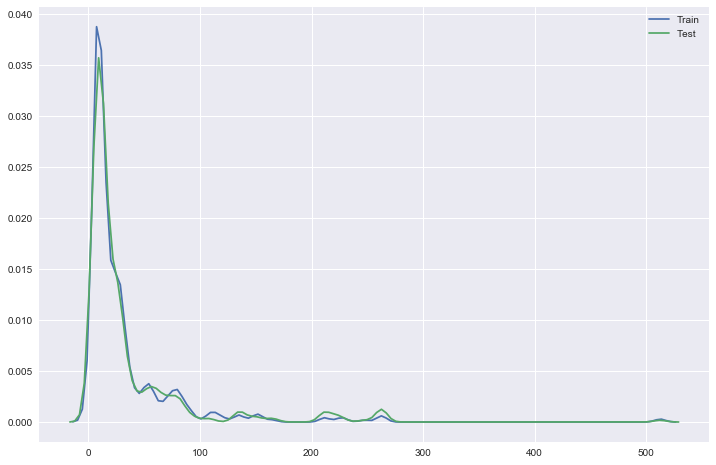

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig, ax = plt.subplots(figsize=[12, 8])

sns.kdeplot(X_train['fare'], label='Train', ax=ax)
sns.kdeplot(X_test['fare'], label='Test', ax=ax)
ax.legend();